In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import pandas as pd
from arrakis_nd import *
from scipy.cluster import hierarchy
import seaborn as sn
import h5py
from arrakis_nd.dataset.common import classification_labels


In [13]:
flow_file = h5py.File('/home/ncarrara/workspace/MiniRun4_1E19_RHC.flow.00000.FLOW.h5')
arr = np.load('/home/ncarrara/workspace/MiniRun4_1E19_RHC.flow.00000.FLOW.arrakis_nd.npz', allow_pickle=True)
meta = arr['meta'].item()

interactions = flow_file["mc_truth/interactions/data"]
stacks = flow_file["mc_truth/stack/data"]
interactions_event_id = interactions["event_id"]
interactions_vertex_id = interactions["vertex_id"]
stack_event_id = stacks["event_id"]
stack_vertex_id = stacks["vertex_id"]
stack_traj_id = stacks["traj_id"]
stack_part_pdg = stacks["part_pdg"]
for event in np.unique(stack_event_id):
    stack_mask = (stack_event_id == event)
    interactions_mask = (interactions_event_id == event)
    stack_vertices = np.unique(stack_vertex_id[stack_mask])
    interactions_vertices = np.unique(interactions_vertex_id[interactions_mask])
    for vertex_id in stack_vertices:
        if vertex_id not in interactions_vertices:
            print("HERE")
    for vertex_id in interactions_vertices:
        if vertex_id not in stack_vertices:
            print("HERE")


In [14]:
events = meta['events']
event = events.index(1)

In [18]:
det_features = arr['det_features'][event]
mc_features = arr['mc_features'][event]
classes = arr['classes'][event]
clusters = arr['clusters'][event]
particles = arr['particles'][event]
tracks = arr['tracks'][event]
track_topology = arr['track_topology'][event]

x = det_features[:, 0]
y = det_features[:, 1]
z = det_features[:, 2]
q = det_features[:, 3]
xyz = det_features[:,0:2]
q /= np.mean(q)

num_photons = mc_features[:, 2]
num_photons /= np.mean(num_photons)

particle_labels = classes[:, 0]
topology_labels = classes[:, 1]
physics_micro_labels = classes[:, 2]
physics_meso_labels = classes[:, 3]
physics_macro_labels = classes[:, 4]

unique_particle_labels = clusters[:, 0]
unique_topology_labels = clusters[:, 1]
unique_physics_micro_labels = clusters[:, 2]
unique_physics_meso_labels = clusters[:, 3]
unique_physics_macro_labels = clusters[:, 4] 

df = pd.DataFrame(columns=['x', 'y', 'z', 'particle_label', 'physics_label', 'topology_label', 'unique_topology'])
particle_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['particle_labels'], orient='index', columns=['particle_label_text']).reset_index()
physics_micro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_micro_labels'], orient='index', columns=['physics_micro_label_text']).reset_index()
physics_meso_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_meso_labels'], orient='index', columns=['physics_meso_label_text']).reset_index()
physics_macro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_macro_labels'], orient='index', columns=['physics_macro_label_text']).reset_index()
topology_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['topology_labels'], orient='index', columns=['topology_label_text']).reset_index()
df['x'] = x
df['y'] = y
df['z'] = z
df['Q'] = q
df['particle_label'] = particle_labels
df['physics_micro_label'] = physics_micro_labels
df['physics_meso_label'] = physics_meso_labels
df['physics_macro_label'] = physics_macro_labels
df['topology_label'] = topology_labels
df['unique_topology_label'] = unique_topology_labels
df = df.merge(particle_label_df, how='left', left_on='particle_label', right_on='index')
df = df.merge(physics_micro_label_df, how='left', left_on='physics_micro_label', right_on='index')
df = df.merge(physics_meso_label_df, how='left', left_on='physics_meso_label', right_on='index')
df = df.merge(physics_macro_label_df, how='left', left_on='physics_macro_label', right_on='index')
df = df.merge(topology_label_df, how='left', left_on='topology_label', right_on='index')


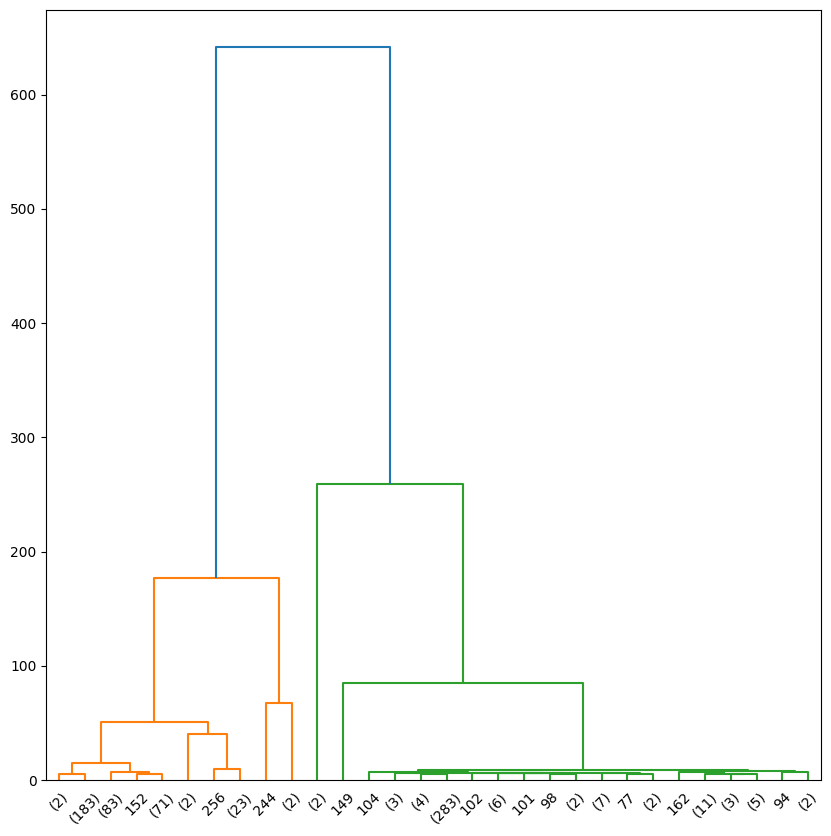

In [16]:
Z = hierarchy.linkage(xyz)
fig, axs = plt.subplots(figsize=(10,10))
dend = hierarchy.dendrogram(Z, p=30, truncate_mode='lastp', ax=axs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


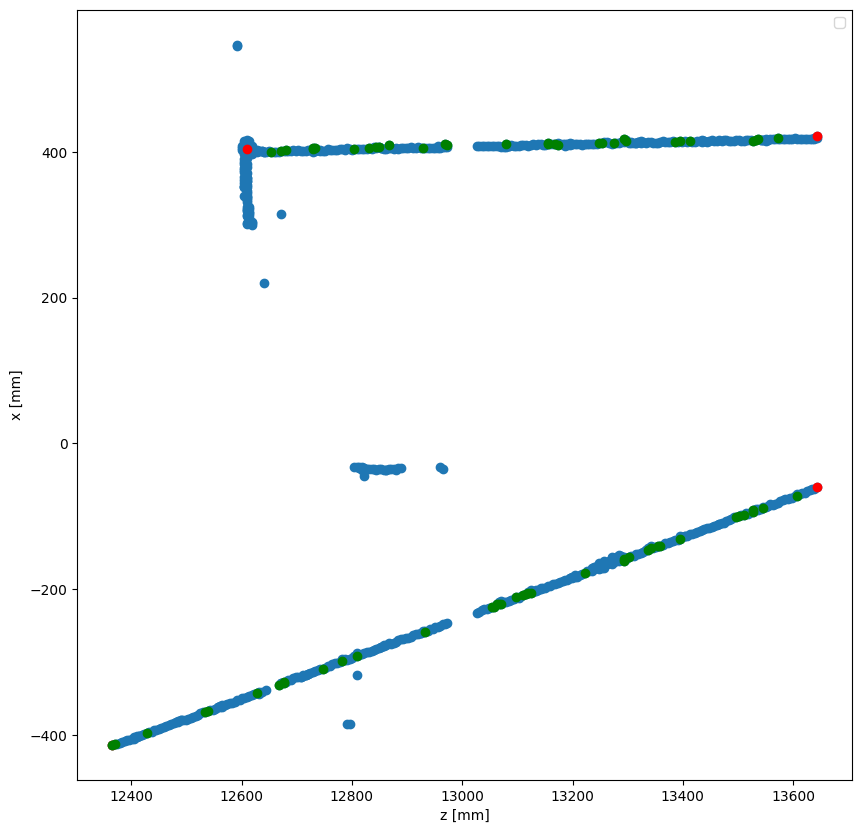

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
print(track_topology)
ax.scatter(z,x)
track_mask = (track_topology[:, 1] == 1) | (track_topology[:, 2] == 1)
delta_mask = (track_topology[:, 3] == 1) | (track_topology[:, 4] == 1)
hit_x = x[track_mask]
hit_y = y[track_mask]
hit_z = z[track_mask]

delta_x = x[delta_mask]
delta_y = y[delta_mask]
delta_z = z[delta_mask]

# hit_x = [x[tracks[5][ii]], x[tracks[10][ii]]]
# hit_y = [y[tracks[5][ii]], y[tracks[10][ii]]]
# hit_z = [z[tracks[5][ii]], z[tracks[10][ii]]]
ax.scatter(hit_z, hit_x, c='r')
ax.scatter(delta_z, delta_x, c='g')
ax.set_xlabel("z [mm]")
ax.set_ylabel("x [mm]")
plt.legend()

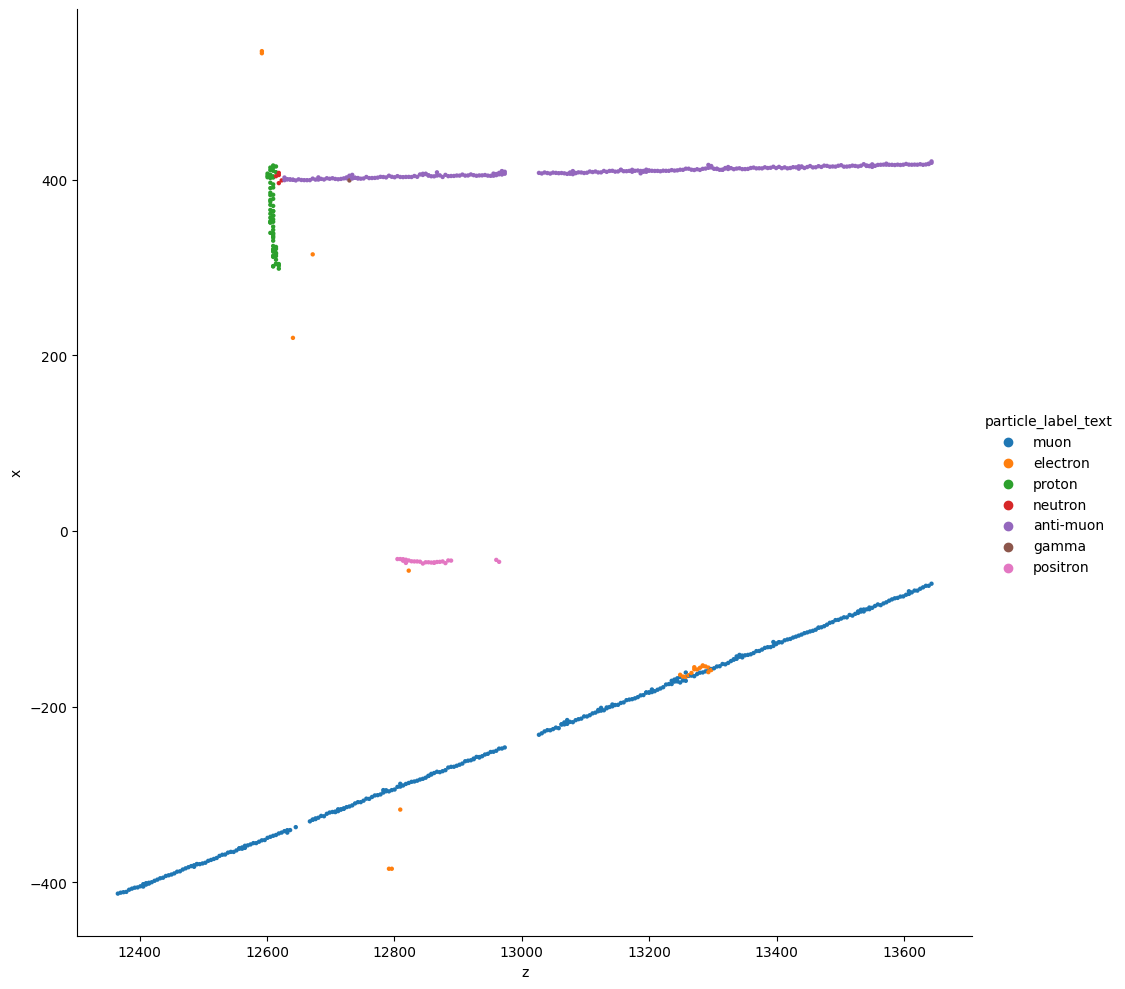

In [61]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="particle_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

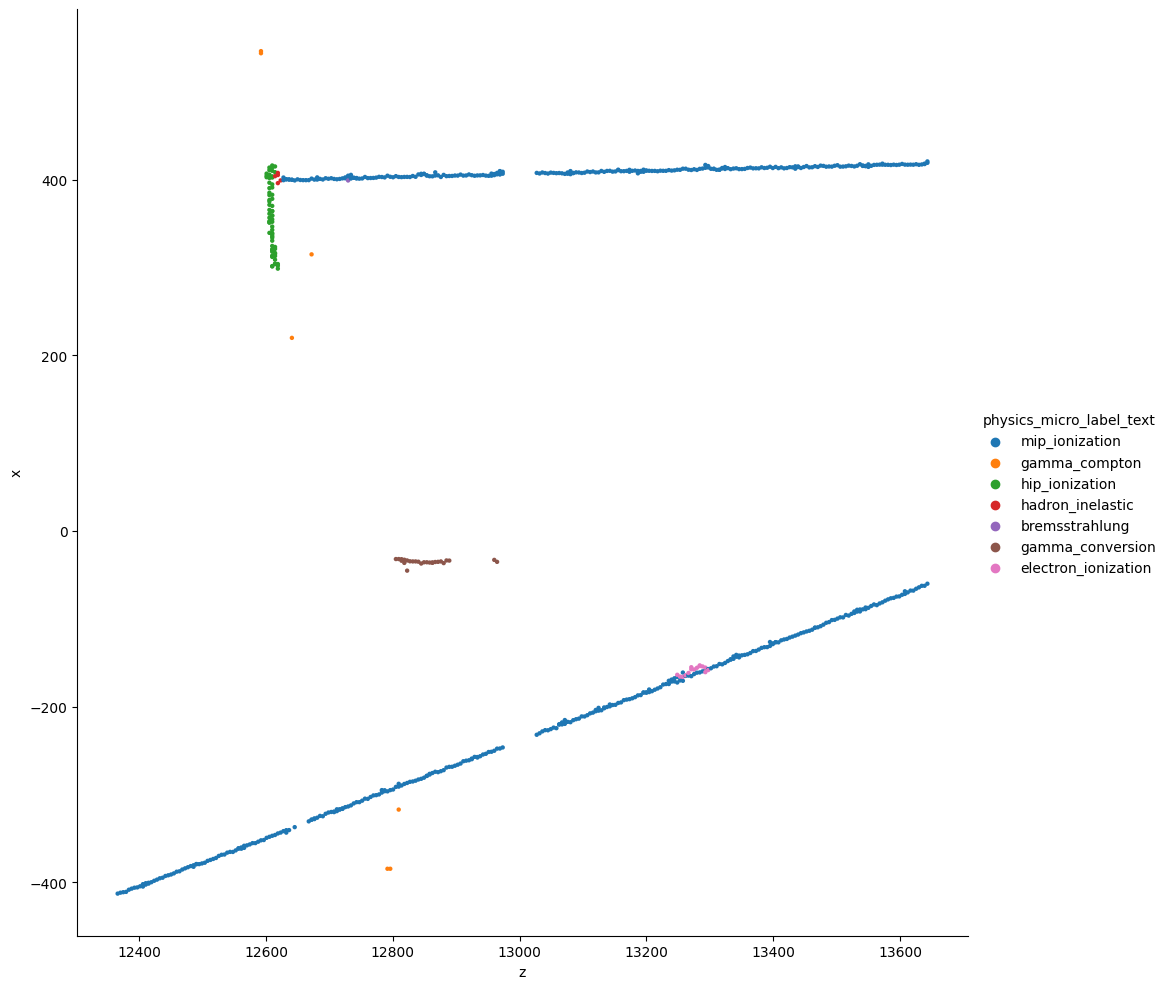

In [64]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_micro_label_text",
    linewidth=0,
    s=10,
    height=10
    
)
plt.show()

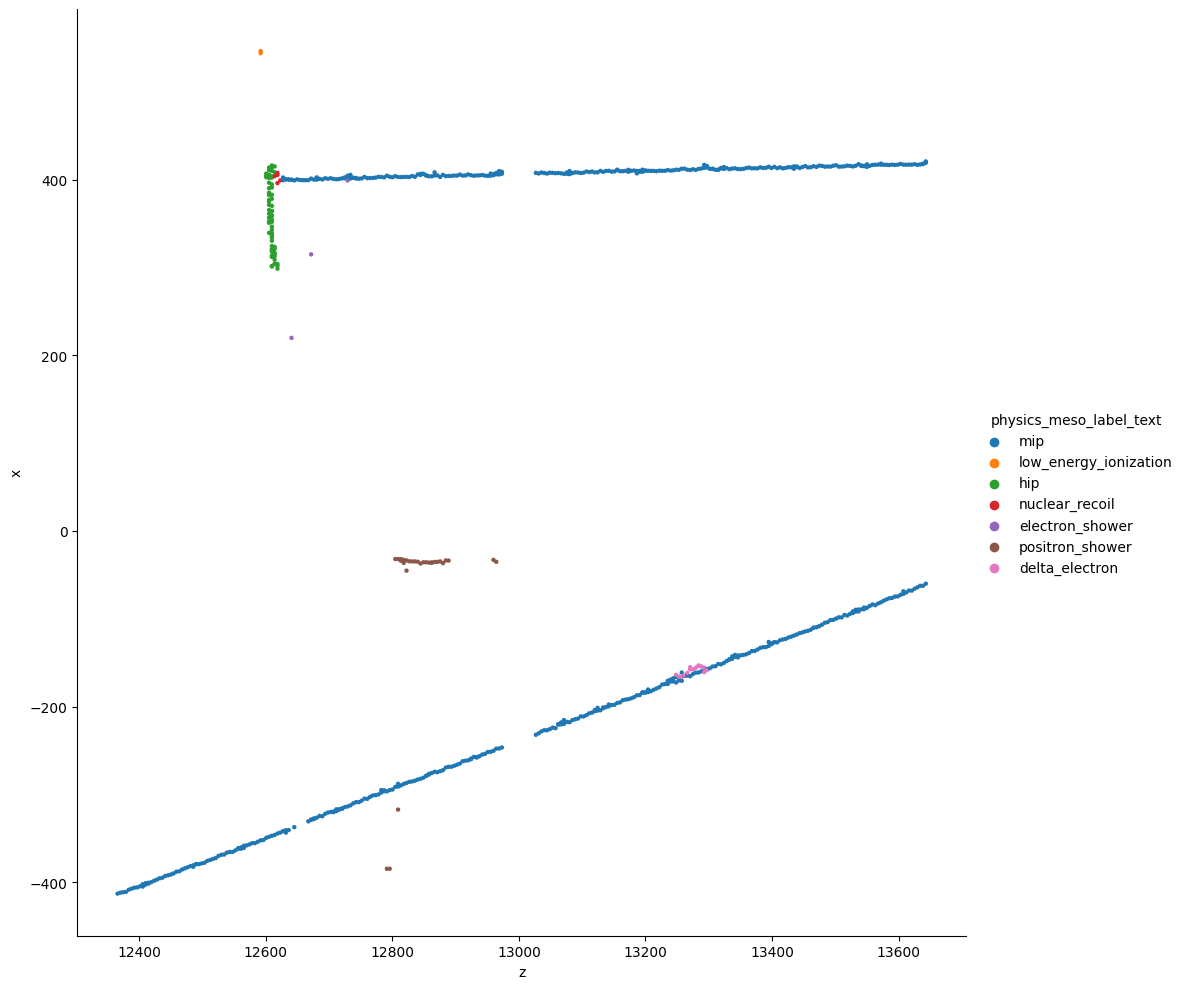

In [65]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_meso_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

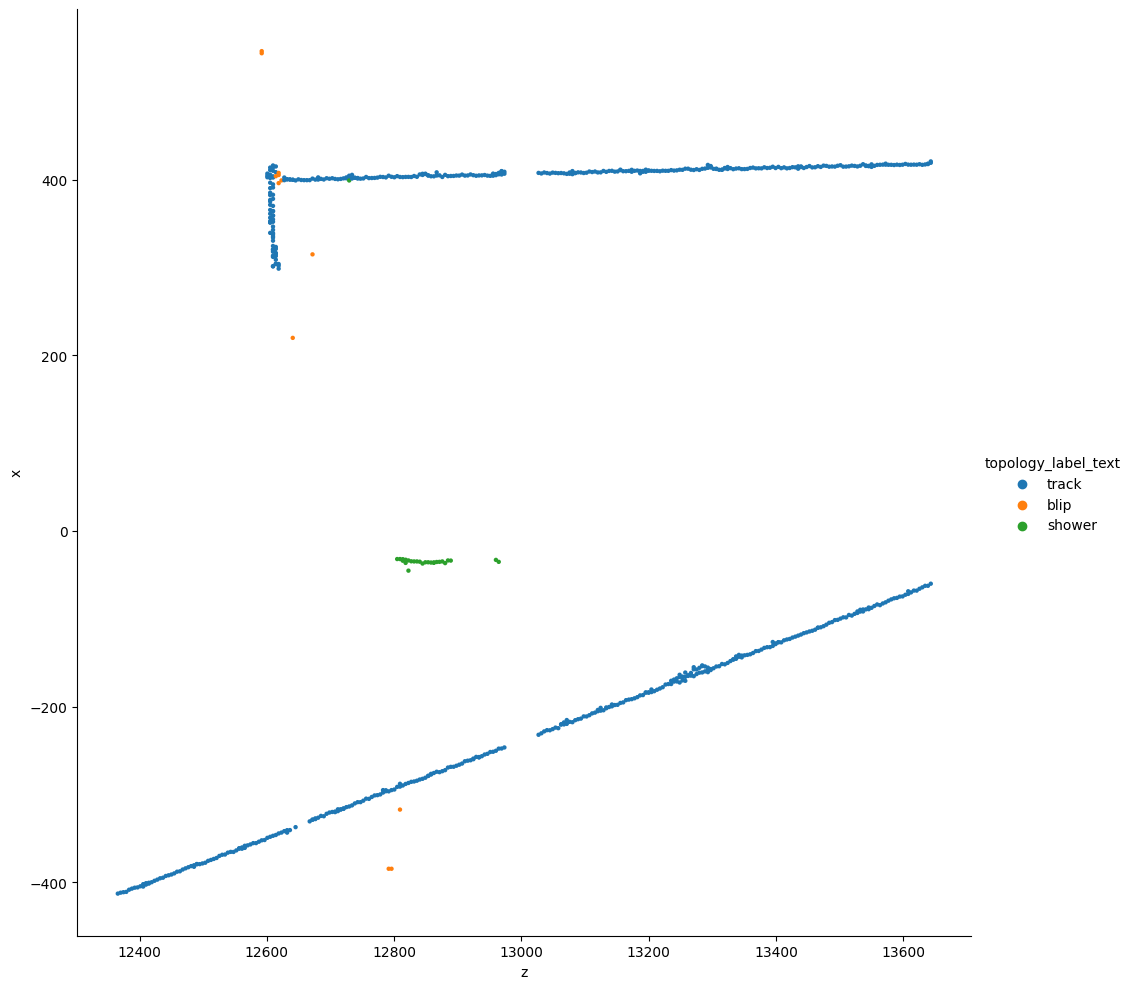

In [66]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="topology_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

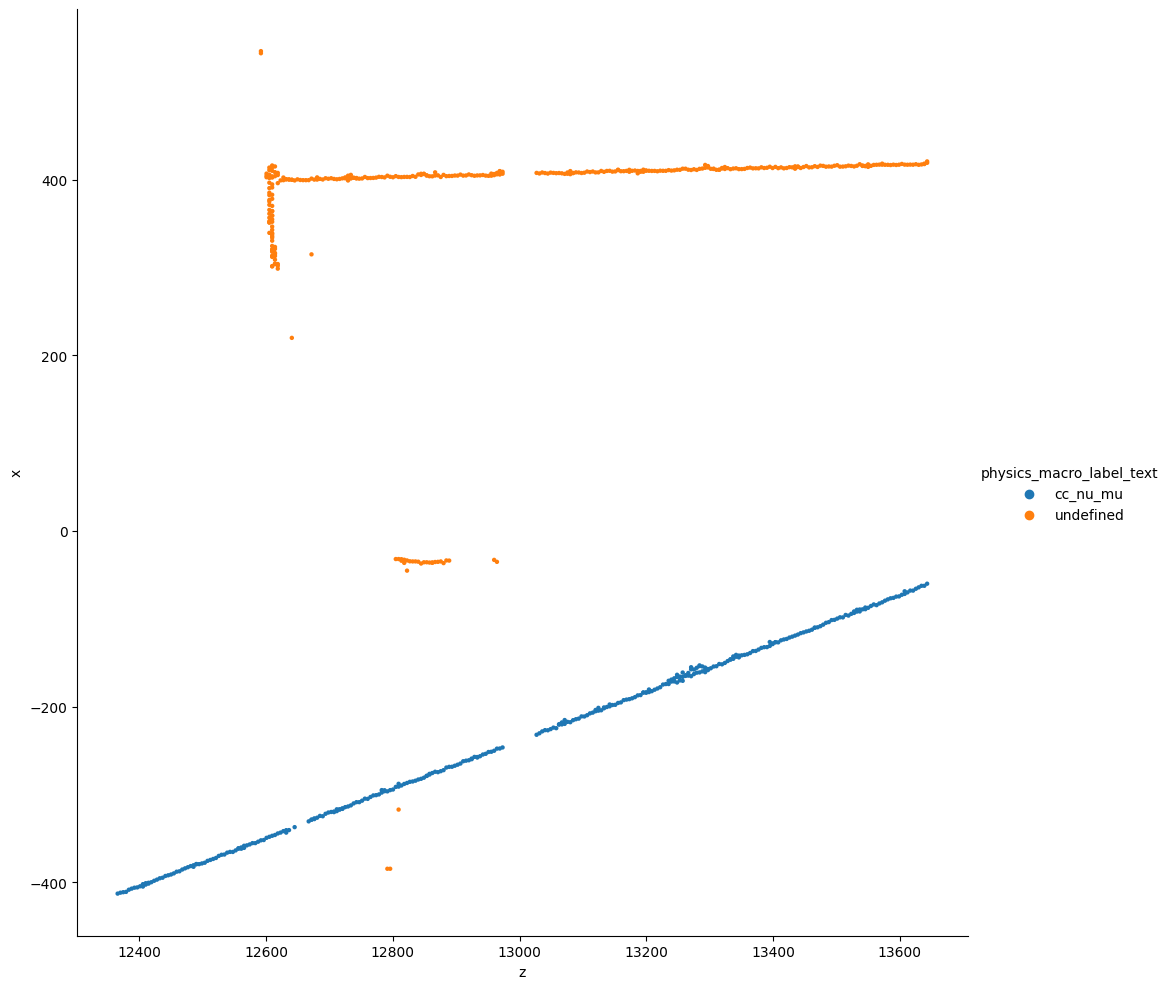

In [67]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="physics_macro_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

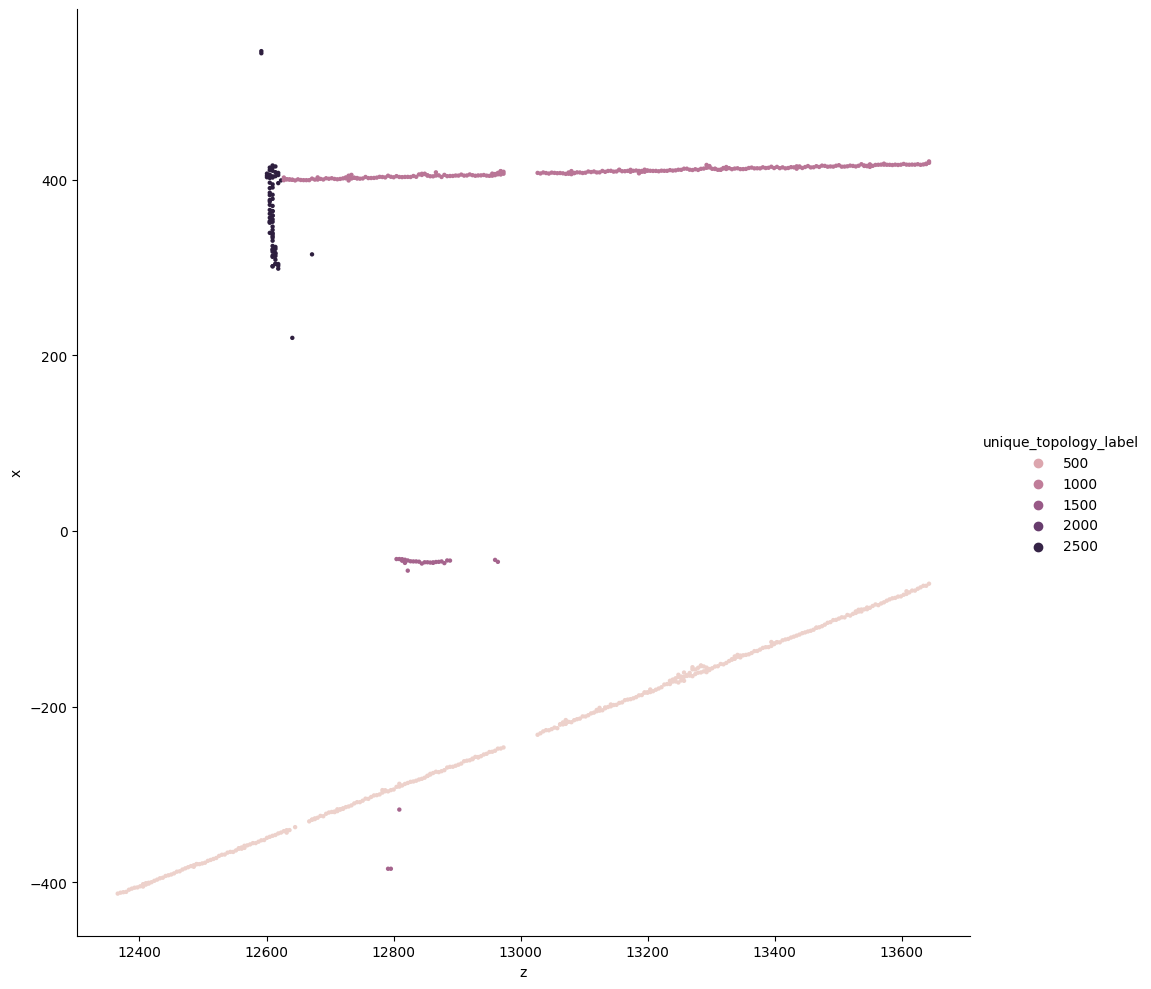

In [68]:
sn.relplot(
    data=df,
    x="z", y="x",
    hue="unique_topology_label",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

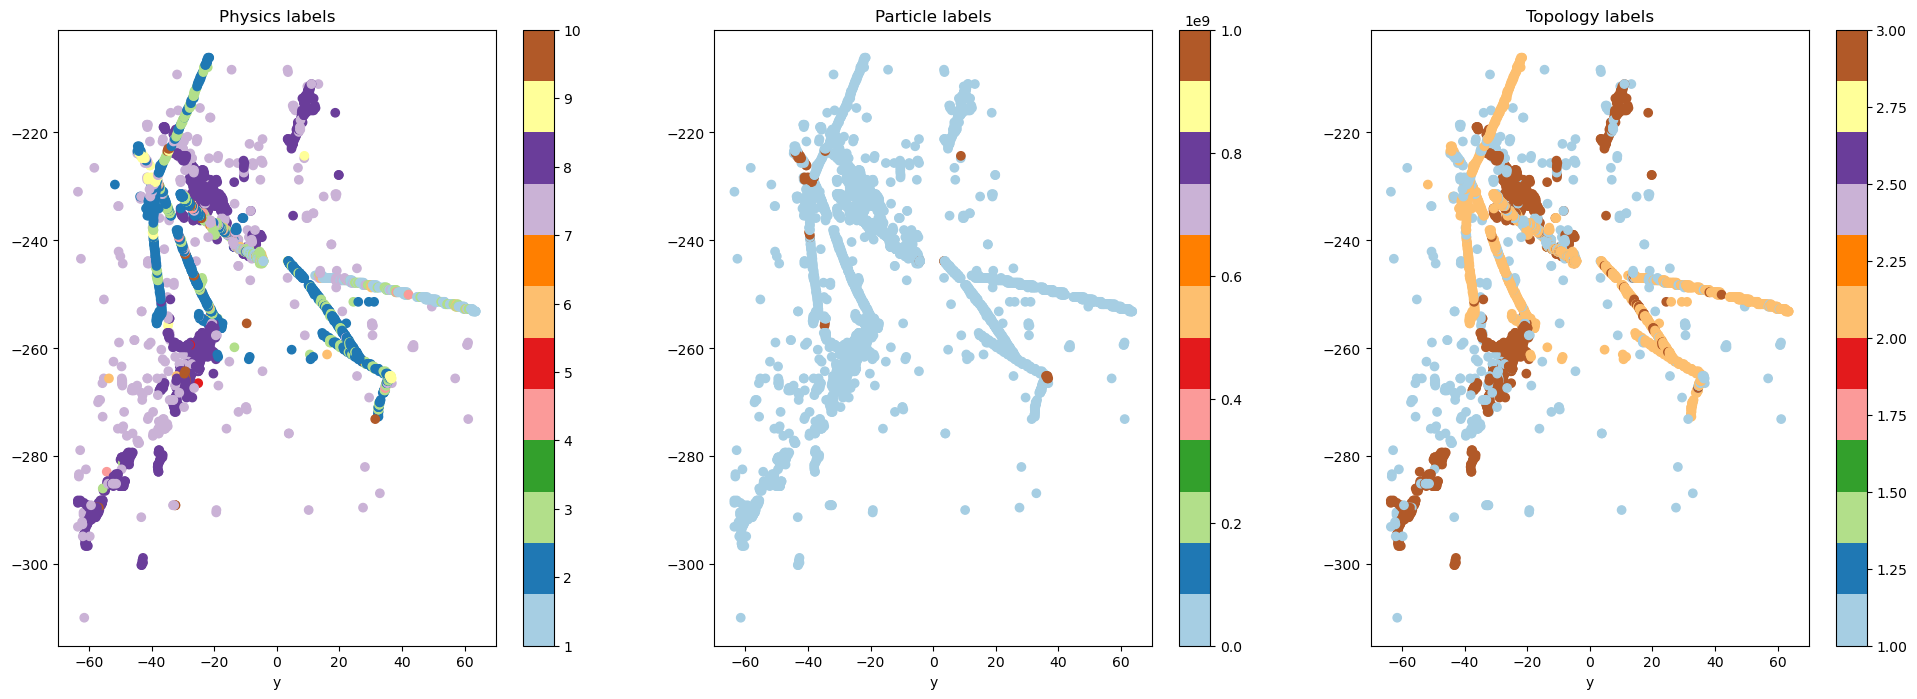

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plot1 = axs[0].scatter(x,y, c=physics_micro_labels, cmap='Paired')
axs[0].set_title('Physics labels')
axs[0].set_xlabel('x')
axs[0].set_xlabel('y')
plt.colorbar(plot1, ax=axs[0])
plot2 = axs[1].scatter(x,y, c=particle_labels, cmap='Paired')
axs[1].set_title('Particle labels')
axs[1].set_xlabel('x')
axs[1].set_xlabel('y')
plt.colorbar(plot2, ax=axs[1])
plot3 = axs[2].scatter(x,y, c=topology_labels, cmap='Paired')
axs[2].set_title('Topology labels')
axs[2].set_xlabel('x')
axs[2].set_xlabel('y')
plt.colorbar(plot3, ax=axs[2])

plt.show()

In [148]:
physics_micro_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_micro_labels_full.append(physics_macro_labels[cloud].data['physics_micro_label'])
physics_meso_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_meso_labels_full.append(physics_macro_labels[cloud].data['physics_meso_label'])
physics_macro_labels_full = []
for i, cloud in enumerate(physics_macro_labels):
    physics_macro_labels_full.append(arr['data'].tolist()[cloud].data['physics_macro_label'])
                          

TypeError: invalid indexing of 0-dim memory

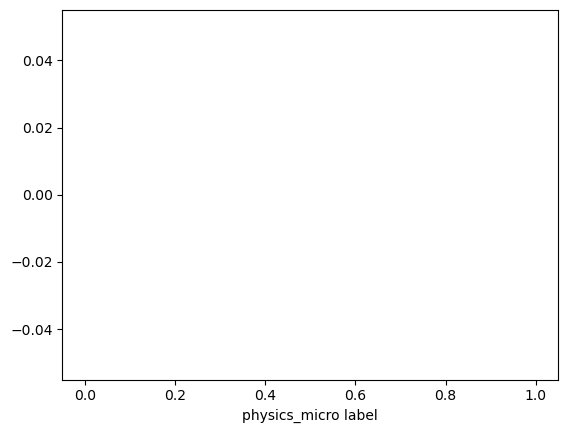

In [ ]:
plt.hist([item for sublist in physics_micro_labels_full for item in sublist], bins=100)
plt.xlabel('physics_micro label')
plt.show()

In [ ]:
plt.hist([item for sublist in physics_meso_labels_full for item in sublist], bins=100)
plt.xlabel('physics_meso label')
plt.show()

NameError: name 'physics_meso_labels_full' is not defined

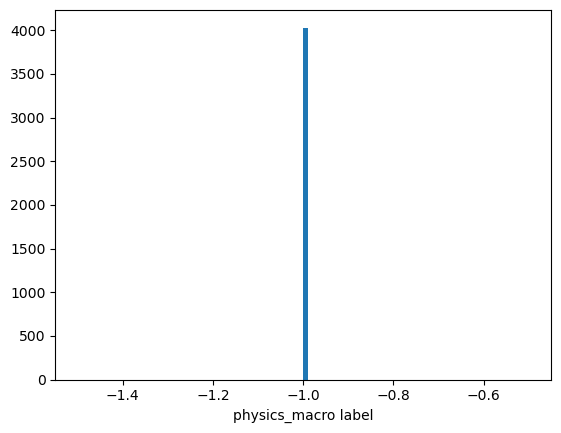

In [ ]:
plt.hist([item for sublist in physics_macro_labels_full for item in sublist], bins=100)
plt.xlabel('physics_macro label')
plt.show()

In [ ]:
particle_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    particle_labels_full.append(arr['data'].tolist()[cloud].data['particle_label'])

In [ ]:
np.unique([item for sublist in particle_labels_full for item in sublist])

array([-2.11000000e+02, -1.30000000e+01, -1.10000000e+01, -1.00000000e+00,
        1.10000000e+01,  1.30000000e+01,  2.20000000e+01,  2.21200000e+03,
        1.00016033e+09,  1.00017037e+09,  1.00018039e+09,  1.00018040e+09])

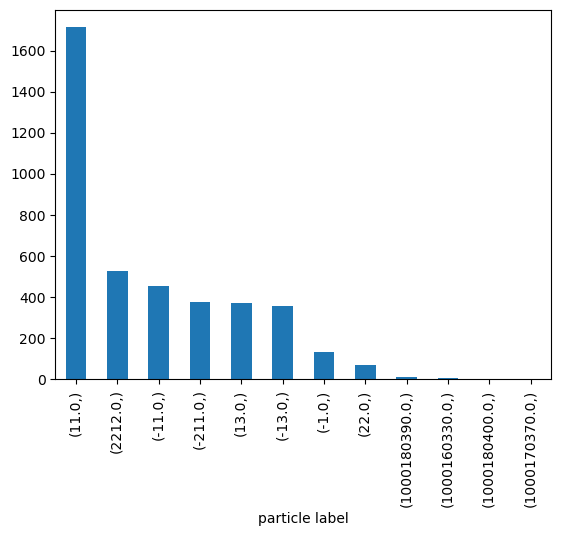

In [ ]:
dd = pd.DataFrame([item for sublist in particle_labels_full for item in sublist])
dd.value_counts().plot(kind='bar')
#plt.hist([item for sublist in particle_labels_full for item in sublist], bins=np.unique([item for sublist in particle_labels_full for item in sublist]))
plt.xlabel('particle label')
#plt.xlim(-23, 23)
plt.show()

In [ ]:
topology_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    topology_labels_full.append(arr['data'].tolist()[cloud].data['topology_label'])

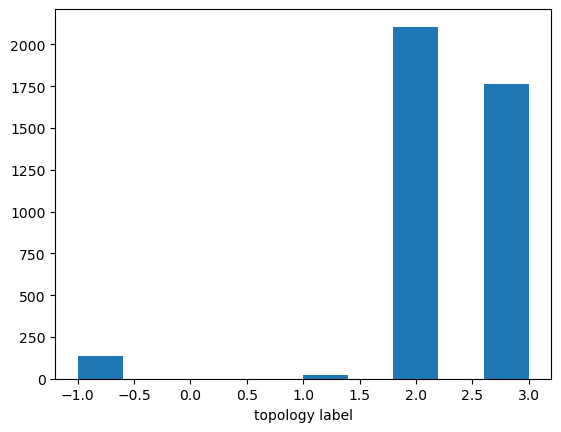

In [ ]:
plt.hist([item for sublist in topology_labels_full for item in sublist])
plt.xlabel('topology label')
plt.show()